### What type of NLP applications can we have from this dataset?
##### 1. Prediction of the rest a poem from a few words
##### 2. Prediction of the theme of a poems
##### 3. Combination of both above : Prediction of the rest of a poem in a specific thema

In [146]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
#import dataframe with poems
df_poems = pd.read_csv('../Data/poems_dataset')
df_poems.drop(columns='Unnamed: 0',inplace=True) 
df_poems.head()

,Theme,Title,Author,Content
0,Absence,Est-ce le Vent...?,PHILIPPE SOUPAULT,Est-ce le vent qui m’apporte tout à coup ces n...
1,Absence,Sous les Arbres Mauves,PHILIPPE SOUPAULT,Sous les arbres mauves\nune nuit mauvaise\nj’a...
2,Adieu,Au Revoir,RALPH WALDO EMERSON,"Au revoir, monde fier! je rentre à la maison:\..."
3,Adieu,Ceci est mon Testament,ROSEMONDE GÉRARD,"Je vous laisse, Ami cher, cette frivole estamp..."
4,Adieu,Les Adieux,SAPPHO,Atthis n'est point sur ses pas retournée.\nVra...


In [137]:
#Exploration of the data
def agg_table(df,feature_to_agg):
    df_agg = df[[feature_to_agg,'Content']].groupby(feature_to_agg)\
                             .agg(['count'])\
                             .sort_values(by=('Content','count'),ascending=False)\

    df_agg.columns = df_agg.columns.droplevel(1)
    return df_agg

In [138]:
#View distribution of theme accross the dataset
df_theme_agg = agg_table(df_poems,'Theme')
print('Number of unique Theme : {}'.format(len(df_poems['Theme'].unique())))
df_theme_agg.head()

Number of unique Theme : 124


,Content
Theme,
Vie,30
Corps,30
Souvenir,30
Dieu,30
Désespoir,30


Text(0.5, 1.0, 'Distribution du nombre de poemes par thématiques')

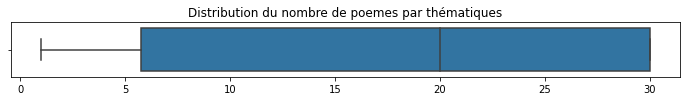

In [139]:
fig = plt.subplots(figsize=(12,1))
sns.boxplot(df_theme_agg)
plt.title("Distribution du nombre de poemes par thématiques")

Text(0.5, 1.0, 'Distribution du nombre de poemes par thématiques')

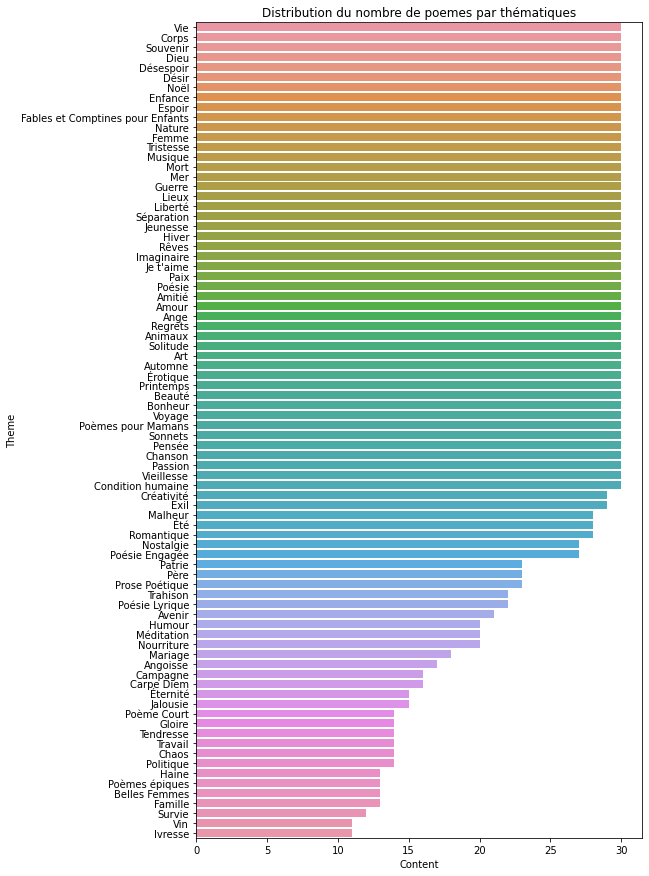

In [140]:
sub_df_theme_agg = df_theme_agg[df_theme_agg['Content'] > 10]
fig = plt.subplots(figsize=(8,15))
sns.barplot(y=sub_df_theme_agg.index,x=sub_df_theme_agg.Content,)
plt.title("Distribution du nombre de poemes par thématiques")

In [141]:
#View distribution of Authors accross the dataset
df_author_agg = agg_table(df_poems,'Author')
print('Number of unique Author : {}'.format(len(df_poems['Author'].unique())))
df_author_agg.head()

Number of unique Author : 550


,Content
Author,
VICTOR HUGO,84
JOH HOPE,60
ALAIN BOSQUET,41
CLÉMENT MAROT,33
PAUL VERLAINE,32


Text(0.5, 1.0, 'Distribution du nombre de poemes par auteurs')

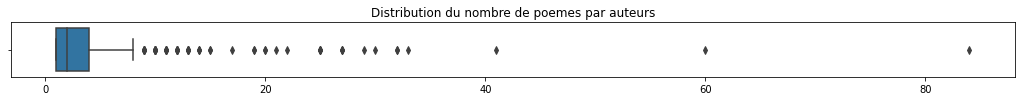

In [142]:
fig = plt.subplots(figsize=(18,1))
sns.boxplot(df_author_agg)
plt.title("Distribution du nombre de poemes par auteurs")

In [143]:
#see an example of the poem structure
p = df_poems.Content[1]
p

'Sous les arbres mauves\nune nuit mauvaise\nj’allais contre le froid\ntous ceux que la faim faisait doucement gémir\ntous ceux qui laissaient tomber les bras\nguettaient dans l’ombre\nIls étaient là près de moi\nLeurs yeux trop grands étaient des menaces\nJ’avais honte de savoir marcher\net une lumière plus douce que la neige\nme tirait\nTu ne me quittais pas\ntu dormais\net ta vie était cette nuit\nque je respirais\nJe savais par mes yeux mes mains mes pas\nque tout s’effaçait\nqu’il n’ y avait plus que la terre\nque la terre\net toi.'

In [144]:
#split this text into sentences
df_poems['List_Sentences'] = [p.split('\n') for p in df_poems.Content]
df_poems.head()

,Theme,Title,Author,Content,List_Sentences
0,Absence,Est-ce le Vent...?,PHILIPPE SOUPAULT,Est-ce le vent qui m’apporte tout à coup ces n...,[Est-ce le vent qui m’apporte tout à coup ces ...
1,Absence,Sous les Arbres Mauves,PHILIPPE SOUPAULT,Sous les arbres mauves\nune nuit mauvaise\nj’a...,"[Sous les arbres mauves, une nuit mauvaise, j’..."
2,Adieu,Au Revoir,RALPH WALDO EMERSON,"Au revoir, monde fier! je rentre à la maison:\...","[Au revoir, monde fier! je rentre à la maison:..."
3,Adieu,Ceci est mon Testament,ROSEMONDE GÉRARD,"Je vous laisse, Ami cher, cette frivole estamp...","[Je vous laisse, Ami cher, cette frivole estam..."
4,Adieu,Les Adieux,SAPPHO,Atthis n'est point sur ses pas retournée.\nVra...,"[Atthis n'est point sur ses pas retournée., Vr..."


In [166]:
#preprocessing of data : Tokeniser
from tensorflow.keras import preprocessing

sentences = df_poems['List_Sentences']
tokeniser = Tokeniser(num_words=100)
tokeniser.fit_on_text(sentences)
word_index = tokeniser.word_index
print(word_index)

ImportError: cannot import name 'preprocessing' from 'tensorflow.keras' (unknown location)

'Est-ce le vent qui m’apporte tout à coup ces nouvelles'